In [4]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt



In [62]:
def split_output(output):
    cnt, prey, predator, berry = [], [], [], []

    for line in output.strip().split('\n'):
        a, b, c, d = map(int, line.split())
        cnt.append(a)
        prey.append(b)
        predator.append(c)
        berry.append(d)

    cnt = np.array(cnt)
    prey = np.array(prey)
    predator = np.array(predator)
    berry = np.array(berry)

    return cnt, prey, predator, berry

In [50]:
#Make sure Callable.java is compiled
def simulate(reproduction_type = "FOOD", step_count = 1000, prey = 10, predator = 10, berry = 10):
    path_to_out = '..\..' #Change it according to your IDE settings
    command = f'java -cp {path_to_out}\out\production\high_fidelity PyInterface.Callable {reproduction_type} {step_count} {prey} {predator} {berry}'

    process = subprocess.Popen(command, stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()
    print(stderr)
    return split_output(stdout.decode())

In [67]:
def plot_populations(prey, predator):
    cnt = np.array(prey.size)
    plt.figure(figsize=(8, 5))
    plt.plot(cnt, prey, label='Prey count')
    plt.plot(cnt, predator, label='Predator count')
    # plt.plot(cnt, berry, label='Berry Count')
    
    plt.title('Simulation')
    plt.xlabel('Time')
    plt.ylabel('Number of species')
    
    plt.legend()
    
    plt.show()

In [51]:
cnt, prey, predator, berry = simulate("FOOD", 1000, 10, 10, 0)

b''


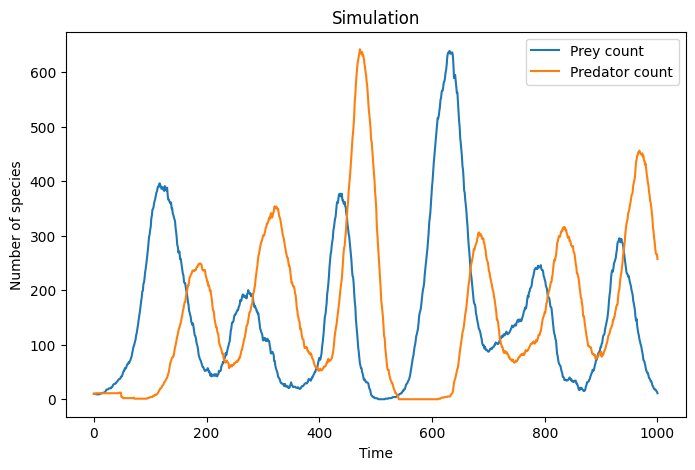

In [52]:
plot_populations(prey, predator)

In [53]:
cnt2, prey2, predator2, berry2 = simulate("FOOD", 5000, 10, 10, 0)

b''


In [57]:
predator2.size

5001

ValueError: x and y must have same first dimension, but have shapes (1,) and (5001,)

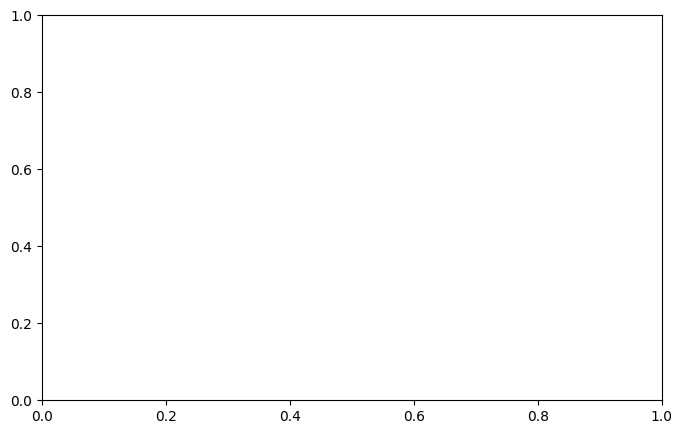

In [68]:
plot_populations(prey2, predator2)